In [1]:
# Importing libraries needed
import numpy as np  # for matrices, array, linear algebra
import pandas as pd  # open source data analysis and manipulation
from numpy import *
import scipy
import scipy.linalg 
import matplotlib.pyplot as plt

In [2]:
# Importing the Dataset
regression=pd.read_csv("HW7q1.csv")

print(regression)

   x  x2   x3    y
0  0   0    0  1.0
1  1   1    1  2.5
2  2   4    8  3.0
3  4  16   64  3.5
4  5  25  125  3.0
5  6  36  216  2.0
6  8  64  512  2.5


In [3]:
# Construct X and Y for x
X1=regression.x.values.reshape(-1, 1)
Xdata_linear = np.array(X1[:,0]).T
X_linear=np.vstack([np.ones(Xdata_linear.shape[0]),Xdata_linear.T]).T
Y=regression.y.values.reshape(-1, 1)
theta_linear=(np.linalg.solve(np.matmul(X_linear.T,X_linear),np.matmul(X_linear.T,Y)))
print("Linear solution: theta_0=", theta_linear[0][0], ", theta_1=", theta_linear[1][0])
linear_rss=np.linalg.norm(np.matmul(X_linear, theta_linear) - Y)**2/7
print("Linear mean RSS = ", linear_rss)
x_values = [3, 7]
y_linear_predictions = [theta_linear[0][0] + theta_linear[1][0]*x for x in x_values]
print(f"Predicted y for x=3: {y_linear_predictions[0]}")
print(f"Predicted y for x=7: {y_linear_predictions[1]}")

Linear solution: theta_0= 2.161849710982658 , theta_1= 0.09104046242774577
Linear mean RSS =  0.5129025598678779
Predicted y for x=3: 2.4349710982658954
Predicted y for x=7: 2.7991329479768785


<function matplotlib.pyplot.show(close=None, block=None)>

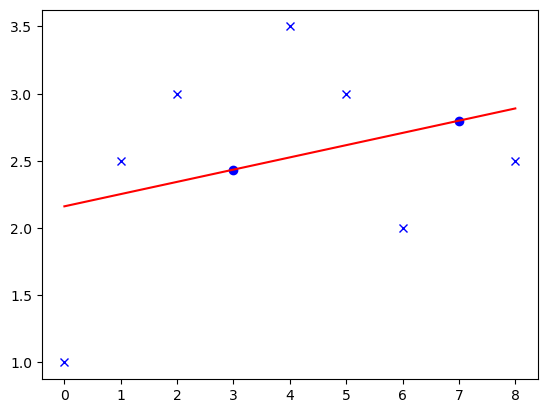

In [4]:
Y_pred = np.matmul(X_linear, theta_linear)
fig,ax = plt.subplots()
ax.plot(Xdata_linear, Y, 'x', color='Blue')
ax.plot(x_values, y_linear_predictions, 'o', color='Blue')
plt.plot(Xdata_linear, Y_pred, color='red')
plt.show

In [5]:
X2=regression.x2.values.reshape(-1, 1)
Xdata_quad = np.array([X1[:,0], X2[:,0]]).T
X_quad=np.vstack([np.ones(Xdata_quad.shape[0]),Xdata_quad.T]).T
theta_quad=(np.linalg.solve(np.matmul(X_quad.T,X_quad),np.matmul(X_quad.T,Y)))
print("Quadratic solution: theta_0=", theta_quad[0][0], ", theta_1=", theta_quad[1][0], ", theta_2=", theta_quad[2][0])
quad_rss=np.linalg.norm(np.matmul(X_quad, theta_quad) - Y)**2/7
print("Quad mean RSS = ", quad_rss)
y_quad_predictions = [theta_quad[0][0] + theta_quad[1][0]*x + theta_quad[2][0]*x**2 for x in x_values]

print(f"Predicted y for x=3: {y_quad_predictions[0]}")
print(f"Predicted y for x=7: {y_quad_predictions[1]}")

Quadratic solution: theta_0= 1.4893117831073963 , theta_1= 0.7455465762947577 , theta_2= -0.0843109141466813
Quad mean RSS =  0.24270383335816076
Predicted y for x=3: 2.967153284671538
Predicted y for x=7: 2.5769030239833164


<function matplotlib.pyplot.show(close=None, block=None)>

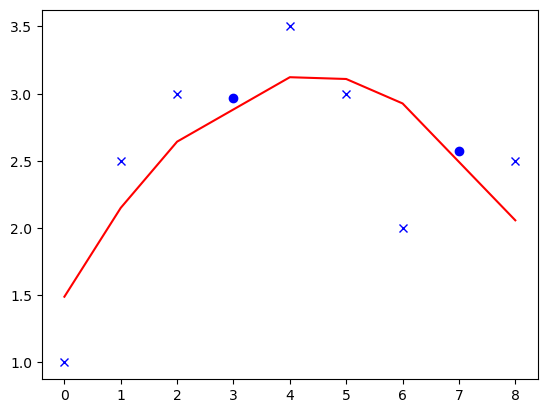

In [6]:
Y_pred = np.matmul(X_quad, theta_quad)
fig,ax = plt.subplots()
ax.plot(Xdata_linear, Y, 'x', color='Blue')
ax.plot(x_values, y_quad_predictions, 'o', color='Blue')
plt.plot(Xdata_linear, Y_pred, color='red')
plt.show

In [7]:
X3=regression.x3.values.reshape(-1, 1)
Xdata_cubic = np.array([X1[:,0], X2[:,0], X3[:,0]]).T
X_cubic=np.vstack([np.ones(Xdata_cubic.shape[0]),Xdata_cubic.T]).T
theta_cubic=(np.linalg.solve(np.matmul(X_cubic.T,X_cubic),np.matmul(X_cubic.T,Y)))
print("Cubic solution: theta_0=", theta_cubic[0][0], ", theta_1=", theta_cubic[1][0], 
      ", theta_2=", theta_cubic[2][0], ", theta_3=", theta_cubic[3][0])
cubic_rss=np.linalg.norm(np.matmul(X_cubic, theta_cubic) - Y)**2/7
print("Cubic mean RSS = ", cubic_rss)
y_cubic_predictions = [theta_cubic[0][0] + theta_cubic[1][0]*x + theta_cubic[2][0]*x**2 + theta_cubic[3][0]*x**3 
                       for x in x_values]

print(f"Predicted y for x=3: {y_cubic_predictions[0]}")
print(f"Predicted y for x=7: {y_cubic_predictions[1]}")

Cubic solution: theta_0= 0.9332253248197286 , theta_1= 2.0294376144943174 , theta_2= -0.4999007274691071 , theta_3= 0.033679860647839406
Cubic mean RSS =  0.05121328050900129
Predicted y for x=3: 3.4317878585723807
Predicted y for x=7: 2.196345182502622


<function matplotlib.pyplot.show(close=None, block=None)>

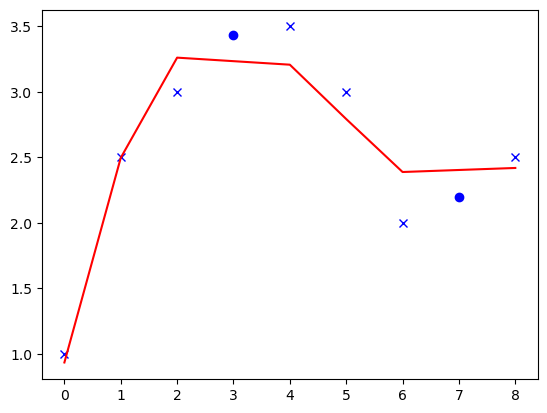

In [8]:
Y_pred = np.matmul(X_cubic, theta_cubic)
fig,ax = plt.subplots()
ax.plot(Xdata_linear, Y, 'x', color='Blue')
ax.plot(x_values, y_cubic_predictions, 'o', color='Blue')
plt.plot(Xdata_linear, Y_pred, color='red')
plt.show

In [9]:
def w(x, xi, tau):
    return np.exp(-np.sum((x - xi)**2)/(2 * tau**2))

def Weight_Matrix(X, tau, x):  # construct the weight matrix W
    ws = [w(x, X[i,:], tau) for i in range(0, len(X))]
    W = np.zeros((len(X), len(X)))  # create a zero square matrix W
    np.fill_diagonal(W, ws) # put the ws into a W along the diagonal
    return W

In [10]:
Wx3t1 = Weight_Matrix(X_linear, 1, 3)
theta_x3t1 = np.linalg.solve(np.matmul(X_linear.T, np.matmul(Wx3t1, X_linear)), 
                             np.matmul(X_linear.T, np.matmul(Wx3t1, Y)))
print("x=3, tau=1: theta_0=", theta_x3t1[0][0], ", theta_1=", theta_x3t1[1][0])
y_x3t1 = theta_x3t1[0][0] + theta_x3t1[1][0]*3
print(f"Predicted y for x=3: {y_x3t1}")

x=3, tau=1: theta_0= 2.5670582324718034 , theta_1= 0.18908407374711758
Predicted y for x=3: 3.134310453713156


<function matplotlib.pyplot.show(close=None, block=None)>

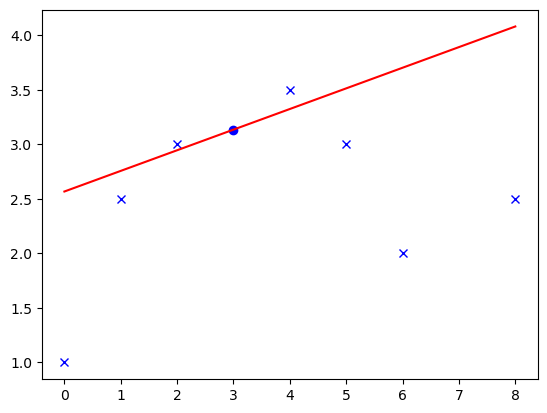

In [11]:
Y_pred = np.matmul(X_linear, theta_x3t1)
fig,ax = plt.subplots()
ax.plot(Xdata_linear, Y, 'x', color='Blue')
ax.plot(3, y_x3t1, 'o', color='Blue')
plt.plot(Xdata_linear, Y_pred, color='red')
plt.show

In [12]:
Wx3t2 = Weight_Matrix(X_linear, 2, 3)
theta_x3t2 = np.linalg.solve(np.matmul(X_linear.T, np.matmul(Wx3t2, X_linear)), 
                             np.matmul(X_linear.T, np.matmul(Wx3t2, Y)))
print("x=3, tau=2: theta_0=", theta_x3t2[0][0], ", theta_1=", theta_x3t2[1][0])
y_x3t2 = theta_x3t2[0][0] + theta_x3t2[1][0]*3
print(f"Predicted y for x=3: {y_x3t2}")

x=3, tau=2: theta_0= 2.322854550953055 , theta_1= 0.14492796902657382
Predicted y for x=3: 2.7576384580327766


<function matplotlib.pyplot.show(close=None, block=None)>

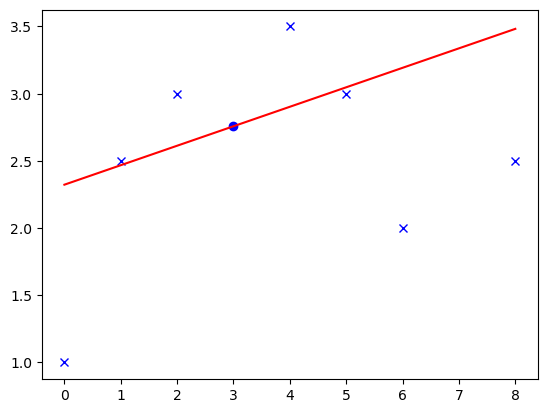

In [13]:
Y_pred = np.matmul(X_linear, theta_x3t2)
fig,ax = plt.subplots()
ax.plot(Xdata_linear, Y, 'x', color='Blue')
ax.plot(3, y_x3t2, 'o', color='Blue')
plt.plot(Xdata_linear, Y_pred, color='red')
plt.show

In [14]:
Wx7t1 = Weight_Matrix(X_linear, 1, 7)
theta_x7t1 = np.linalg.solve(np.matmul(X_linear.T, np.matmul(Wx7t1, X_linear)), 
                             np.matmul(X_linear.T, np.matmul(Wx7t1, Y)))
print("x=7, tau=1: theta_0=", theta_x7t1[0][0], ", theta_1=", theta_x7t1[1][0])
y_x7t1 = theta_x7t1[0][0] + theta_x7t1[1][0]*7
print(f"Predicted y for x=7: {y_x7t1}")

x=7, tau=1: theta_0= 2.0147618812942287 , theta_1= 0.047239794500546786
Predicted y for x=7: 2.3454404427980564


<function matplotlib.pyplot.show(close=None, block=None)>

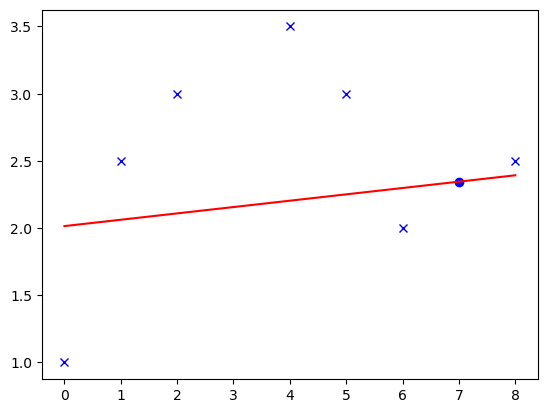

In [15]:
Y_pred = np.matmul(X_linear, theta_x7t1)
fig,ax = plt.subplots()
ax.plot(Xdata_linear, Y, 'x', color='Blue')
ax.plot(7, y_x7t1, 'o', color='Blue')
plt.plot(Xdata_linear, Y_pred, color='red')
plt.show

In [16]:
Wx7t2 = Weight_Matrix(X_linear, 2, 7)
theta_x7t2 = np.linalg.solve(np.matmul(X_linear.T, np.matmul(Wx7t2, X_linear)), 
                             np.matmul(X_linear.T, np.matmul(Wx7t2, Y)))
print("x=7, tau=2: theta_0=", theta_x7t2[0][0], ", theta_1=", theta_x7t2[1][0])
y_x7t2 = theta_x7t2[0][0] + theta_x7t2[1][0]*7
print(f"Predicted y for x=7: {y_x7t2}")

x=7, tau=2: theta_0= 3.5550925495632164 , theta_1= -0.16084084459610162
Predicted y for x=7: 2.429206637390505


<function matplotlib.pyplot.show(close=None, block=None)>

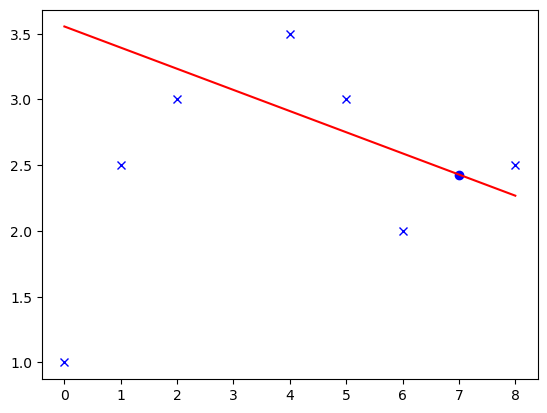

In [17]:
Y_pred = np.matmul(X_linear, theta_x7t2)
fig,ax = plt.subplots()
ax.plot(Xdata_linear, Y, 'x', color='Blue')
ax.plot(7, y_x7t2, 'o', color='Blue')
plt.plot(Xdata_linear, Y_pred, color='red')
plt.show